<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/LSTM_Model_Tensorflow_Dengan_DeteksiSarkasme_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌LSTM Model Tensorflow Dengan DeteksiSarkasme.json**

# Install Library

In [1]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.5 MB/s eta 0:00:00


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import keras_tuner as kt


# Load Dataset

In [6]:
import json # Import the json module

# Membaca dataset JSON Lines
data = []
with open('/content/DeteksiSarkasme.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df = df[['headline', 'is_sarcastic']]

display(df)


,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [9]:
# Tokenize the text data (headlines)
tokenizer = Tokenizer(num_words=5000, lower=True)
# Get all headlines from the list of dictionaries
headlines = [d['headline'] for d in data]
tokenizer.fit_on_texts(headlines) # Fit on the list of headlines


In [11]:
# Convert the headlines into sequences of integers

X = tokenizer.texts_to_sequences([d['headline'] for d in data])


In [12]:
# Pad sequences to ensure consistent input length
X_pad = pad_sequences(X, maxlen=100)


In [14]:
# Target variable (sarcasm label)
y = [d['is_sarcastic'] for d in data]


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


# Bangun Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Embedding layer
    model.add(LSTM(128, return_sequences=False))  # LSTM layer
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
model = create_model()
model.summary()


# Latih Model

In [19]:
import tensorflow as tf

# Convert X_train and X_test to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

# Train the model using the TensorFlow Datasets
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7122 - loss: 0.5733 - val_accuracy: 0.8478 - val_loss: 0.3518
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8764 - loss: 0.2897 - val_accuracy: 0.8529 - val_loss: 0.3494
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9115 - loss: 0.2213 - val_accuracy: 0.8527 - val_loss: 0.3795
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9355 - loss: 0.1718 - val_accuracy: 0.8456 - val_loss: 0.4323
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9477 - loss: 0.1381 - val_accuracy: 0.8446 - val_loss: 0.5151
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9588 - loss: 0.1095 - val_accuracy: 0.8385 - val_loss: 0.5652
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9692 - loss: 0.0825 - val_accuracy: 0.8386 - val_loss: 0.6595
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9782 - loss: 0.0628 - val_accuracy

# Visualisasi

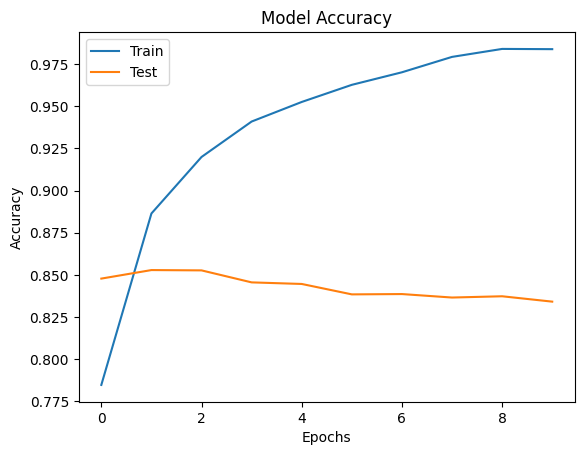

In [20]:
# Plot training & validation accuracy and loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


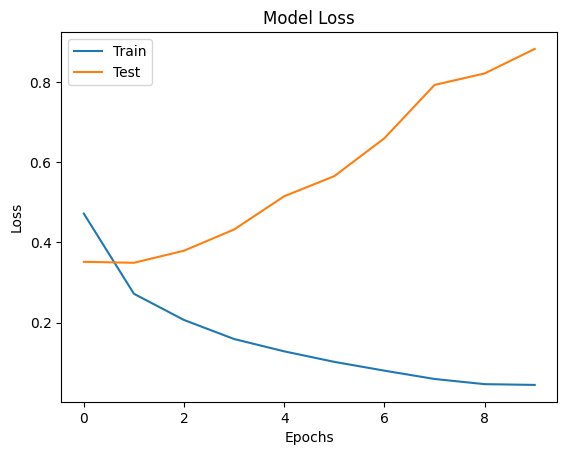

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluasi Model

In [22]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict(X_test))


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [23]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")


Accuracy: 0.8341445151628604
Precision: 0.8213028169014085
Recall: 0.7953964194373402
F1 Score: 0.8081420528367259
AUC-ROC: 0.899696255991222


# Hyperparameter Tuning with Keras Tuner

In [24]:
# Hyperparameter Tuning with Keras Tuner
def build_model_hp(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [25]:
# Initialize the tuner
tuner = kt.Hyperband(build_model_hp, objective='val_accuracy', max_epochs=5, factor=3, directory='my_dir', project_name='sarcasm_detection')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
# Search for the best hyperparameters

import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)  # Adjust batch size as needed

# Convert validation data to TensorFlow Dataset as well
validation_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

# Use train_dataset and validation_dataset for tuner.search
tuner.search(train_dataset, epochs=5, validation_data=validation_dataset)

Trial 8 Complete [00h 00m 24s]
val_accuracy: 0.8521153330802917

Best val_accuracy So Far: 0.8545488715171814
Total elapsed time: 00h 06m 45s


In [36]:
# Get the best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]

# Convert X_test and y_test to TensorFlow Datasets for evaluation
eval_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64) # Use the same batch size as training

# Evaluate the best model using the TensorFlow Dataset
best_model.evaluate(eval_dataset)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8590 - loss: 0.3324


[0.34180334210395813, 0.8545488715171814]